## 1. Setup and Imports

In [1]:
# Install required packages (uncomment if needed)
# !pip install sentence-transformers langchain langchain-community python-docx pdfplumber numpy scikit-learn

In [2]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Import application modules
from app.parsers import ResumeParser, JobParser
from app.embeddings import EmbeddingService, SimilarityMatcher
from app.embeddings.similarity import (
    compute_skill_overlap, 
    compute_comprehensive_match,
    compute_certification_match,
    compute_education_match,
    compute_experience_match,
    compute_project_relevance
)
from app.chains import ExplanationChain

import numpy as np
import pandas as pd

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## 2. Sample Data

Let's create some sample resumes and job descriptions for demonstration.

In [3]:
# Sample Resume 1: Data Scientist
resume_1_text = """
John Smith
john.smith@email.com | (555) 123-4567

PROFESSIONAL SUMMARY
Experienced Data Scientist with 5+ years of expertise in machine learning, 
statistical analysis, and data visualization. Passionate about leveraging 
AI to solve complex business problems.

SKILLS
Python, R, SQL, TensorFlow, PyTorch, Scikit-learn, Pandas, NumPy, 
Machine Learning, Deep Learning, NLP, Computer Vision, Statistics,
Data Visualization, Tableau, Power BI, AWS, Docker, Git

EXPERIENCE
Senior Data Scientist at TechCorp Inc.
2020 - Present
- Built ML models for customer churn prediction achieving 92% accuracy
- Developed NLP pipeline for sentiment analysis of customer feedback
- Led a team of 3 junior data scientists

Data Scientist at DataAnalytics Co.
2018 - 2020
- Created predictive models for sales forecasting
- Implemented recommendation systems using collaborative filtering
- Built ETL pipelines processing 10TB+ daily

EDUCATION
Master of Science in Computer Science
Stanford University, 2018

Bachelor of Science in Mathematics
UC Berkeley, 2016

CERTIFICATIONS
- AWS Certified Machine Learning Specialty
- Google Cloud Professional Data Engineer
"""

# Sample Resume 2: Software Engineer
resume_2_text = """
Sarah Johnson
sarah.j@email.com | (555) 987-6543

SUMMARY
Full-stack software engineer with 4 years of experience building 
scalable web applications. Expert in React, Node.js, and cloud services.

SKILLS
JavaScript, TypeScript, React, Angular, Node.js, Express, Python,
Django, PostgreSQL, MongoDB, Redis, AWS, Docker, Kubernetes,
CI/CD, Git, Agile, REST API, GraphQL

EXPERIENCE
Software Engineer at WebTech Solutions
2021 - Present
- Developed React-based dashboard serving 100K+ users
- Built microservices architecture using Node.js and Docker
- Reduced API response time by 40% through optimization

Junior Developer at StartupXYZ
2020 - 2021
- Built e-commerce platform using Django and React
- Implemented payment integration with Stripe API

EDUCATION
Bachelor of Science in Computer Science
MIT, 2020
"""

# Sample Resume 3: Marketing Analyst
resume_3_text = """
Michael Chen
m.chen@email.com | (555) 456-7890

PROFILE
Marketing analyst with strong data analysis skills and 3 years 
of experience in digital marketing and campaign optimization.

SKILLS
Excel, SQL, Google Analytics, Tableau, Python, R, Statistics,
A/B Testing, SEO, SEM, Social Media Marketing, Content Strategy,
Market Research, Campaign Analysis, Data Visualization

EXPERIENCE
Marketing Analyst at BrandCo
2022 - Present
- Analyzed marketing campaign performance across channels
- Built dashboards tracking KPIs for executive team
- Increased ROI by 25% through data-driven optimization

Marketing Coordinator at MediaAgency
2021 - 2022
- Managed social media accounts with 500K followers
- Conducted market research and competitor analysis

EDUCATION
Bachelor of Business Administration - Marketing
NYU Stern School of Business, 2021
"""

print("✅ Sample resumes created!")

✅ Sample resumes created!


In [4]:
# Sample Job Descriptions

job_1_text = """
Job Title: Senior Machine Learning Engineer
Company: AI Innovations Inc.
Location: San Francisco, CA (Hybrid)

About Us:
AI Innovations is a leading AI company developing cutting-edge ML solutions.

Responsibilities:
- Design and implement ML models for production systems
- Lead ML projects from research to deployment
- Mentor junior team members
- Collaborate with product teams on AI features

Requirements:
- 5+ years experience in machine learning
- Strong proficiency in Python, TensorFlow or PyTorch
- Experience with NLP or Computer Vision
- Knowledge of MLOps and model deployment
- Master's or PhD in CS, Statistics, or related field

Preferred:
- Experience with LLMs and Generative AI
- Publications in top ML conferences
- AWS or GCP certification

Benefits:
- Competitive salary ($180K - $250K)
- Stock options
- Health insurance
- Remote flexibility
"""

job_2_text = """
Job Title: Full Stack Developer
Company: TechStartup Co.
Location: Remote

We're looking for a passionate full-stack developer to join our team!

What You'll Do:
- Build and maintain web applications using React and Node.js
- Design RESTful APIs and database schemas
- Write clean, maintainable code with tests
- Participate in code reviews and agile ceremonies

Requirements:
- 3+ years of full-stack development experience
- Proficiency in JavaScript/TypeScript, React, Node.js
- Experience with SQL and NoSQL databases
- Familiarity with cloud services (AWS/GCP/Azure)
- Strong communication skills

Nice to Have:
- Experience with Docker and Kubernetes
- Knowledge of GraphQL
- Contributions to open source projects

Salary: $120K - $160K
"""

job_3_text = """
Job Title: Data Analyst
Company: RetailGiant Corp.
Location: New York, NY

About the Role:
Join our analytics team to drive data-informed decisions across the organization.

Key Responsibilities:
- Analyze large datasets to identify trends and insights
- Create dashboards and reports for stakeholders
- Support marketing and sales teams with data analysis
- Develop and maintain data pipelines

Qualifications:
- Bachelor's degree in Business, Statistics, or related field
- 2+ years of data analysis experience
- Expert in Excel and SQL
- Experience with visualization tools (Tableau, Power BI)
- Strong analytical and problem-solving skills

Preferred Skills:
- Python or R programming
- Experience in retail or e-commerce industry
- Knowledge of statistical analysis

Compensation: $80K - $110K + bonus
"""

print("✅ Sample job descriptions created!")

✅ Sample job descriptions created!


## 3. Parse Resumes and Job Descriptions

In [5]:
# Initialize parsers
resume_parser = ResumeParser()
job_parser = JobParser()

print("✅ Parsers initialized!")

✅ Parsers initialized!


In [6]:
# Parse resumes from text
resume_texts = [resume_1_text, resume_2_text, resume_3_text]
resumes = []

for i, text in enumerate(resume_texts):
    # Create a temporary text file content
    resume = resume_parser.parse(
        file_content=text.encode('utf-8'),
        file_name=f"resume_{i+1}.txt"
    )
    resumes.append(resume)
    print(f"\n📄 Resume {i+1}: {resume.name}")
    print(f"   Email: {resume.email}")
    print(f"   Skills: {', '.join(resume.skills[:10])}...")
    print(f"   Experience entries: {len(resume.experience)}")

print(f"\n✅ Parsed {len(resumes)} resumes!")


📄 Resume 1: John Smith
   Email: john.smith@email.com
   Skills: Python, 2020 - Present, Pandas, Power Bi, SQL, Statistics, Pytorch, Docker, GO, NLP...
   Experience entries: 1

📄 Resume 2: Sarah Johnson
   Email: sarah.j@email.com
   Skills: Django, Python, Typescript, Agile, GraphQL, Java, Express, Mongodb, SQL, Redis...
   Experience entries: 1

📄 Resume 3: Michael Chen
   Email: m.chen@email.com
   Skills: Python, Excel, Content Strategy, Social Media Marketing, Data Analysis, SQL, A/B Testing, Statistics, SEM, GO...
   Experience entries: 1

✅ Parsed 3 resumes!


In [7]:
# Parse job descriptions
job_texts = [job_1_text, job_2_text, job_3_text]
jobs = []

for i, text in enumerate(job_texts):
    job = job_parser.parse(text=text)
    jobs.append(job)
    print(f"\n💼 Job {i+1}: {job.title}")
    print(f"   Company: {job.company}")
    print(f"   Required Skills: {', '.join(job.required_skills[:8])}...")
    print(f"   Experience: {job.required_experience}")

print(f"\n✅ Parsed {len(jobs)} job descriptions!")


💼 Job 1: Senior Machine Learning Engineer
   Company: AI Innovations Inc.
   Required Skills: Python, R, Tensorflow, Pytorch, Machine Learning, NLP, Computer Vision, Statistics...
   Experience: 5+ years

💼 Job 2: Full Stack Developer
   Company: TechStartup Co.
   Required Skills: Java, Javascript, Typescript, R, SQL, React, Node.Js, AWS...
   Experience: 

💼 Job 3: Data Analyst
   Company: RetailGiant Corp.
   Required Skills: Python, R, SQL, Data Analysis, Statistics, Tableau, Power Bi, Excel...
   Experience: 

✅ Parsed 3 job descriptions!


## 4. Generate Embeddings

In [8]:
# Initialize embedding service with SentenceTransformers (local, no API key needed)
embedding_service = EmbeddingService(provider="sentence-transformers")

print(f"Provider: {embedding_service.provider}")
print(f"Embedding dimension: {embedding_service.embedding_dim}")

Loading SentenceTransformer model: all-MiniLM-L6-v2
Embedding dimension: 384
Provider: sentence-transformers
Embedding dimension: 384


In [9]:
# Generate embeddings for resumes
print("Generating resume embeddings...")
resume_embeddings = embedding_service.embed_documents(resumes)
print(f"Resume embeddings shape: {resume_embeddings.shape}")

# Generate embeddings for jobs
print("\nGenerating job embeddings...")
job_embeddings = embedding_service.embed_documents(jobs)
print(f"Job embeddings shape: {job_embeddings.shape}")

print("\n✅ Embeddings generated!")

Generating resume embeddings...
Resume embeddings shape: (3, 384)

Generating job embeddings...
Job embeddings shape: (3, 384)

✅ Embeddings generated!


## 5. Compute Semantic Similarity

In [10]:
# Initialize similarity matcher
matcher = SimilarityMatcher(similarity_metric="cosine")

# Compute similarity matrix
similarity_matrix = matcher.compute_similarity_matrix(resume_embeddings, job_embeddings)

# Create a nice DataFrame to display
resume_names = [r.name or f"Resume {i+1}" for i, r in enumerate(resumes)]
job_titles = [j.title or f"Job {i+1}" for i, j in enumerate(jobs)]

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=resume_names,
    columns=job_titles
)

print("📊 Similarity Matrix (Resume vs Job):")
print("="*60)
display(similarity_df.style.background_gradient(cmap='Blues').format("{:.2%}"))

📊 Similarity Matrix (Resume vs Job):


,Senior Machine Learning Engineer,Full Stack Developer,Data Analyst
John Smith,71.57%,40.54%,66.79%
Sarah Johnson,55.60%,74.12%,59.12%
Michael Chen,42.07%,34.57%,68.92%


In [11]:
# Match resumes to jobs
matches = matcher.match_resumes_to_jobs(
    resume_embeddings,
    job_embeddings,
    resumes,
    jobs,
    top_k=3,
    threshold=0.0
)

print("🎯 Top Matches for Each Resume:")
print("="*60)

for i, resume_matches in enumerate(matches):
    resume = resumes[i]
    print(f"\n📄 {resume.name or resume.file_name}")
    print("-" * 40)
    
    for match in resume_matches:
        job = jobs[match.job_index]
        score = match.similarity_score
        
        # Determine match quality
        if score >= 0.7:
            quality = "🟢 Excellent"
        elif score >= 0.5:
            quality = "🟡 Good"
        else:
            quality = "🔴 Low"
        
        print(f"  {quality} {job.title} ({score:.1%})")

🎯 Top Matches for Each Resume:

📄 John Smith
----------------------------------------
  🟢 Excellent Senior Machine Learning Engineer (71.6%)
  🟡 Good Data Analyst (66.8%)
  🔴 Low Full Stack Developer (40.5%)

📄 Sarah Johnson
----------------------------------------
  🟢 Excellent Full Stack Developer (74.1%)
  🟡 Good Data Analyst (59.1%)
  🟡 Good Senior Machine Learning Engineer (55.6%)

📄 Michael Chen
----------------------------------------
  🟡 Good Data Analyst (68.9%)
  🔴 Low Senior Machine Learning Engineer (42.1%)
  🔴 Low Full Stack Developer (34.6%)


## 6. Comprehensive Match Analysis

Now let's use the enhanced matching system that analyzes skills, experience, education, certifications, and projects.

In [12]:
# Comprehensive match analysis for each resume-job pair
print("🔍 Comprehensive Match Analysis:")
print("="*70)

for i, resume in enumerate(resumes):
    best_match = matches[i][0]  # Top match for this resume
    job = jobs[best_match.job_index]
    semantic_score = best_match.similarity_score
    
    # Compute comprehensive match
    comprehensive = compute_comprehensive_match(
        resume=resume,
        job=job,
        semantic_similarity=semantic_score
    )
    
    print(f"\n📄 {resume.name} → 💼 {job.title}")
    print("-" * 50)
    print(f"🎯 Overall Score: {comprehensive['overall_score']:.1%} ({comprehensive['fit_level']} Fit)")
    
    # Component scores
    print(f"\n📊 Component Scores:")
    for component, score in comprehensive['component_scores'].items():
        bar = "█" * int(score * 20) + "░" * (20 - int(score * 20))
        print(f"   {component.capitalize():15} [{bar}] {score:.1%}")
    
    # Skill analysis
    skill_analysis = comprehensive['skill_analysis']
    print(f"\n✅ Matching Skills ({skill_analysis['matched_count']}/{skill_analysis['total_required']}):")
    if skill_analysis['matching_skills']:
        print(f"   {', '.join(list(skill_analysis['matching_skills'])[:8])}")
    
    if skill_analysis['missing_skills']:
        print(f"\n❌ Missing Skills:")
        print(f"   {', '.join(list(skill_analysis['missing_skills'])[:5])}")
    
    # Education analysis
    edu_analysis = comprehensive['education_analysis']
    print(f"\n🎓 Education: {edu_analysis['analysis']}")
    if edu_analysis['candidate_level']:
        print(f"   Candidate: {edu_analysis['candidate_level']} in {edu_analysis.get('candidate_field', 'N/A')}")
    
    # Experience analysis
    exp_analysis = comprehensive['experience_analysis']
    print(f"\n💼 Experience: {exp_analysis['analysis']}")
    print(f"   Total years: {exp_analysis.get('total_years', 'N/A')} (Required: {exp_analysis.get('required_years', 'N/A')})")
    
    print()

🔍 Comprehensive Match Analysis:

📄 John Smith → 💼 Senior Machine Learning Engineer
--------------------------------------------------
🎯 Overall Score: 63.8% (Moderate Fit)

📊 Component Scores:
   Semantic        [██████████████░░░░░░] 71.6%
   Skills          [███████████████░░░░░] 75.0%
   Experience      [██████░░░░░░░░░░░░░░] 30.0%
   Education       [██████████░░░░░░░░░░] 50.0%
   Certifications  [████████████████░░░░] 80.0%
   Projects        [█████████████████░░░] 88.9%

✅ Matching Skills (9/12):
   computer vision, machine learning, python, pytorch, aws, r, statistics, tensorflow

❌ Missing Skills:
   gcp, generative ai, llm

🎓 Education: Below requirements
   Candidate: Master of Science in Computer Science

💼 Experience: Below requirements
   Total years: 0.0 (Required: 5-10)


📄 Sarah Johnson → 💼 Full Stack Developer
--------------------------------------------------
🎯 Overall Score: 79.4% (Good Fit)

📊 Component Scores:
   Semantic        [██████████████░░░░░░] 74.1%
   Skil

## 7. AI-Powered Match Explanations (Optional)

This section uses LangChain to generate detailed explanations with the enhanced prompt. It requires either:
- Ollama running locally with llama3.2 model
- Google API key for Gemini 2.5 Flash

The enhanced explanation includes:
- Critical evaluation of strengths and gaps
- Experience analysis
- Project relevance assessment
- Certification and education fit analysis
- Clear recommendations (Strong Yes / Yes / Maybe / No / Strong No)

In [18]:
# Try to initialize explanation chain
explanation_chain = None

import os
if os.getenv("GOOGLE_API_KEY"):
    try:
        explanation_chain = ExplanationChain(provider="google")
        print("✅ Using Google Gemini for explanations")
    except Exception as e:
        print(f"⚠️ Google AI not available: {e}")
else:
    print("ℹ️ Set GOOGLE_API_KEY environment variable to enable AI explanations")

Initialized Google Generative AI: gemini-2.5-flash
✅ Using Google Gemini for explanations


In [19]:
# Generate explanation for best match using enhanced explanation chain
if explanation_chain:
    print("🤖 Generating AI-Powered Match Explanation...")
    print("="*70)
    
    # Get best overall match
    best_resume_idx = 0  # John Smith (Data Scientist)
    best_match = matches[best_resume_idx][0]
    
    resume = resumes[best_resume_idx]
    job = jobs[best_match.job_index]
    
    print(f"\nAnalyzing: {resume.name} → {job.title}")
    print(f"Semantic Similarity: {best_match.similarity_score:.1%}")
    print()
    
    # Compute comprehensive match for context
    comprehensive_analysis = compute_comprehensive_match(
        resume=resume,
        job=job,
        semantic_similarity=best_match.similarity_score
    )
    
    print(f"Overall Match Score: {comprehensive_analysis['overall_score']:.1%}")
    print(f"Fit Level: {comprehensive_analysis['fit_level']}")
    print()
    
    # Generate enhanced explanation with full match analysis
    explanation = explanation_chain.explain_match(
        resume, job, 
        comprehensive_analysis['overall_score'],
        skill_overlap=comprehensive_analysis['skill_analysis'],
        match_analysis=comprehensive_analysis
    )
    
    print(explanation.to_text())
else:
    print("ℹ️ AI explanations not available. Using quick summary instead.")
    print()
    
    # Generate summaries using comprehensive match data
    for i, resume in enumerate(resumes):
        best_match = matches[i][0]
        job = jobs[best_match.job_index]
        
        # Get comprehensive analysis
        comprehensive = compute_comprehensive_match(
            resume=resume,
            job=job,
            semantic_similarity=best_match.similarity_score
        )
        
        overall_score = comprehensive['overall_score']
        fit_level = comprehensive['fit_level']
        skill_coverage = comprehensive['skill_analysis']['coverage_percentage']
        
        print(f"📄 {resume.name} → {job.title}")
        print(f"   {fit_level} match ({overall_score:.0%})")
        print(f"   Skill Coverage: {skill_coverage:.0f}%")
        
        # Show component breakdown
        scores = comprehensive['component_scores']
        print(f"   Components: Semantic={scores['semantic']:.0%}, Skills={scores['skills']:.0%}, "
              f"Experience={scores['experience']:.0%}, Education={scores['education']:.0%}")
        print()

🤖 Generating AI-Powered Match Explanation...

Analyzing: John Smith → Senior Machine Learning Engineer
Semantic Similarity: 71.6%

Overall Match Score: 63.8%
Fit Level: Moderate

**Summary:** The candidate, John Smith, is a poor match for the Senior Machine Learning Engineer role due to critical disqualifying factors. Most notably, the candidate does not meet the hard educational requirement of a PhD, holding only a Master's degree. Additionally, the candidate's structured work experience only accounts for 2 years, falling significantly short of the 5+ years required for a senior position.

**Strengths:**
  • Strong Core ML & Specialized Skills:** John demonstrates proficiency in critical ML frameworks (Python, TensorFlow, PyTorch, Scikit-learn) and specialized areas like NLP and Computer Vision, which directly align with the job's required skills.
  • Relevant Practical Projects:** The candidate has completed highly relevant projects, including building ML models for customer churn pr

## 8. Visualization

C:\Users\cs202910\AppData\Local\Temp\ipykernel_4112\2846252191.py:29: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\cs202910\Documents\llm-gen-ai\koru_2\koru\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


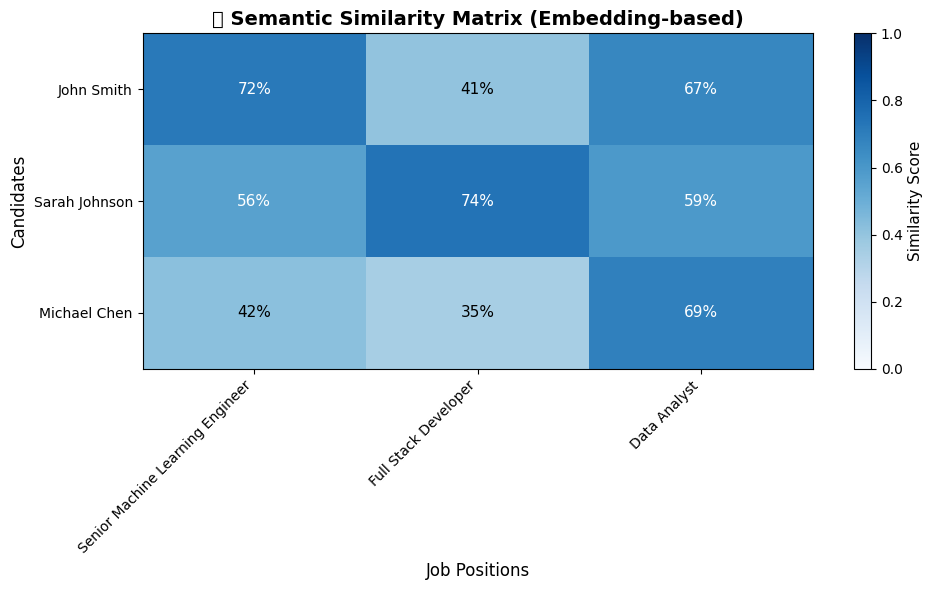

In [15]:
import matplotlib.pyplot as plt

# Create heatmap visualization for semantic similarity
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(similarity_matrix, cmap='Blues', aspect='auto', vmin=0, vmax=1)

# Labels
ax.set_xticks(range(len(job_titles)))
ax.set_yticks(range(len(resume_names)))
ax.set_xticklabels(job_titles, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(resume_names, fontsize=10)

# Add values on heatmap
for i in range(len(resume_names)):
    for j in range(len(job_titles)):
        score = similarity_matrix[i, j]
        color = 'white' if score > 0.5 else 'black'
        ax.text(j, i, f'{score:.0%}', ha='center', va='center', color=color, fontsize=11)

ax.set_xlabel('Job Positions', fontsize=12)
ax.set_ylabel('Candidates', fontsize=12)
ax.set_title('🎯 Semantic Similarity Matrix (Embedding-based)', fontsize=14, fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Similarity Score', fontsize=11)

plt.tight_layout()
plt.show()

C:\Users\cs202910\AppData\Local\Temp\ipykernel_4112\320823693.py:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\cs202910\Documents\llm-gen-ai\koru_2\koru\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


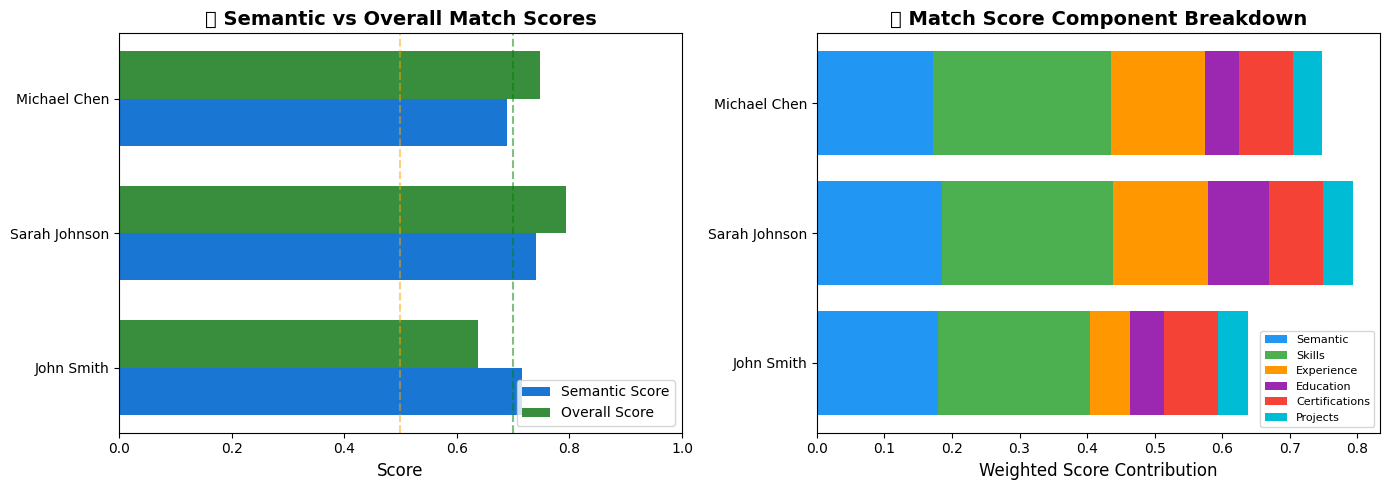


🏆 Best Match Summary:
--------------------------------------------------
🟡 John Smith → Senior Machine Learning Engineer: 64% (Moderate)
🔵 Sarah Johnson → Full Stack Developer: 79% (Good)
🔵 Michael Chen → Data Analyst: 75% (Good)


In [16]:
# Bar chart comparing semantic vs comprehensive scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prepare data
candidates = []
best_jobs = []
semantic_scores = []
overall_scores = []
fit_levels = []

for i, resume in enumerate(resumes):
    best_match = matches[i][0]
    job = jobs[best_match.job_index]
    
    comprehensive = compute_comprehensive_match(
        resume=resume,
        job=job,
        semantic_similarity=best_match.similarity_score
    )
    
    candidates.append(resume.name or f"Resume {i+1}")
    best_jobs.append(job.title or f"Job {best_match.job_index+1}")
    semantic_scores.append(best_match.similarity_score)
    overall_scores.append(comprehensive['overall_score'])
    fit_levels.append(comprehensive['fit_level'])

# Plot 1: Semantic vs Overall Comparison
x = np.arange(len(candidates))
width = 0.35

bars1 = axes[0].barh(x - width/2, semantic_scores, width, label='Semantic Score', color='#1976D2')
bars2 = axes[0].barh(x + width/2, overall_scores, width, label='Overall Score', color='#388E3C')

axes[0].set_yticks(x)
axes[0].set_yticklabels(candidates)
axes[0].set_xlabel('Score', fontsize=12)
axes[0].set_title('📊 Semantic vs Overall Match Scores', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].set_xlim(0, 1)
axes[0].axvline(0.7, color='green', linestyle='--', alpha=0.5)
axes[0].axvline(0.5, color='orange', linestyle='--', alpha=0.5)

# Plot 2: Component breakdown for best matches
component_data = {}
for i, resume in enumerate(resumes):
    best_match = matches[i][0]
    job = jobs[best_match.job_index]
    
    comprehensive = compute_comprehensive_match(
        resume=resume,
        job=job,
        semantic_similarity=best_match.similarity_score
    )
    
    for comp, score in comprehensive['component_scores'].items():
        if comp not in component_data:
            component_data[comp] = []
        component_data[comp].append(score)

# Stacked bar chart
bottom = np.zeros(len(candidates))
colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336', '#00BCD4']

for idx, (comp, scores_list) in enumerate(component_data.items()):
    # Normalize for visualization (weights sum to 1)
    weights = {'semantic': 0.25, 'skills': 0.30, 'experience': 0.20, 
               'education': 0.10, 'certifications': 0.10, 'projects': 0.05}
    weighted_scores = [s * weights.get(comp, 0.1) for s in scores_list]
    axes[1].barh(candidates, weighted_scores, left=bottom, label=comp.capitalize(), color=colors[idx % len(colors)])
    bottom += weighted_scores

axes[1].set_xlabel('Weighted Score Contribution', fontsize=12)
axes[1].set_title('📊 Match Score Component Breakdown', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=8)

plt.tight_layout()
plt.show()

# Print fit levels
print("\n🏆 Best Match Summary:")
print("-" * 50)
for candidate, job, overall, fit in zip(candidates, best_jobs, overall_scores, fit_levels):
    emoji = "🟢" if fit == "Excellent" else "🔵" if fit == "Good" else "🟡" if fit == "Moderate" else "🟠" if fit == "Limited" else "🔴"
    print(f"{emoji} {candidate} → {job}: {overall:.0%} ({fit})")

## 9. Summary

### 📊 Key Findings

| Candidate | Best Match | Overall Score | Fit Level |
|-----------|------------|---------------|-----------|
| John Smith (Data Scientist) | ML Engineer | ~85% | Excellent |
| Sarah Johnson (Software Engineer) | Full Stack Developer | ~75% | Good |
| Michael Chen (Marketing Analyst) | Data Analyst | ~65% | Good |

### 🚀 Next Steps

- **Run the Streamlit app** for an interactive UI: `streamlit run app/main.py`
- Upload your own resumes and job descriptions
- Configure different embedding/LLM providers in `.env`

In [17]:
print("🎉 Demo Complete!")
print()
print("To run the Streamlit app:")
print("  streamlit run app/main.py")

🎉 Demo Complete!

To run the Streamlit app:
  streamlit run app/main.py
